In [56]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as pandas_ta
%matplotlib inline


In [120]:
tickers = ['AAPL']
df = yf.download(tickers, start='2018-12-01', end='2023-01-01')

df['MA50'] = df['Close'].rolling(window=50, min_periods=0).mean()
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean()
df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.291538,163210000,46.205002,46.205002
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.343216,165377200,45.188751,45.188751
2018-12-06,42.939999,43.695000,42.605000,43.680000,41.871113,172393600,44.685834,44.685834


In [123]:

df['rsi'] = pandas_ta.rsi(close=df['Close'], length=20)

def compute_macd(data):
    data ['ema12'] = data ['Adj Close'].ewm(span=12). mean ()
    data ['ema26'] = data ['Adj Close'].ewm(span=26).mean ( )
    data ['macd'] = data ['ema12'] - data ['ema26']
    data ['macd signal'] = data ['macd'].ewm(span=9). mean ( )
    data ['macd_histogram'] = data ['macd'] - data ['macd signal']
    return data

compute_macd(df)

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,rsi,ema12,ema26,macd,macd signal,macd_histogram
Date,,,,,,,,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.291538,163210000,46.205002,46.205002,NaN,44.291538,44.291538,0.000000,0.000000,0.000000
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.343216,165377200,45.188751,45.188751,NaN,43.236197,43.279909,-0.043712,-0.024285,-0.019428
2018-12-06,42.939999,43.695000,42.605000,43.680000,41.871113,172393600,44.685834,44.685834,NaN,42.703404,42.773742,-0.070338,-0.043159,-0.027179
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.378113,169126400,44.045001,44.045001,NaN,41.969401,42.104029,-0.134628,-0.074145,-0.060484
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.644119,248104000,43.716001,43.716001,NaN,41.609326,41.765470,-0.156144,-0.098537,-0.057606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959930,63814900,144.131800,152.133100,38.846201,135.832948,139.462799,-3.629851,-2.530715,-1.099136
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800,143.964799,152.009600,37.382510,134.803639,138.698328,-3.894689,-2.803510,-1.091179
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179672,85438400,143.637399,151.886700,34.407103,133.323029,137.696946,-4.373917,-3.117591,-1.256326


<BarContainer object of 1027 artists>

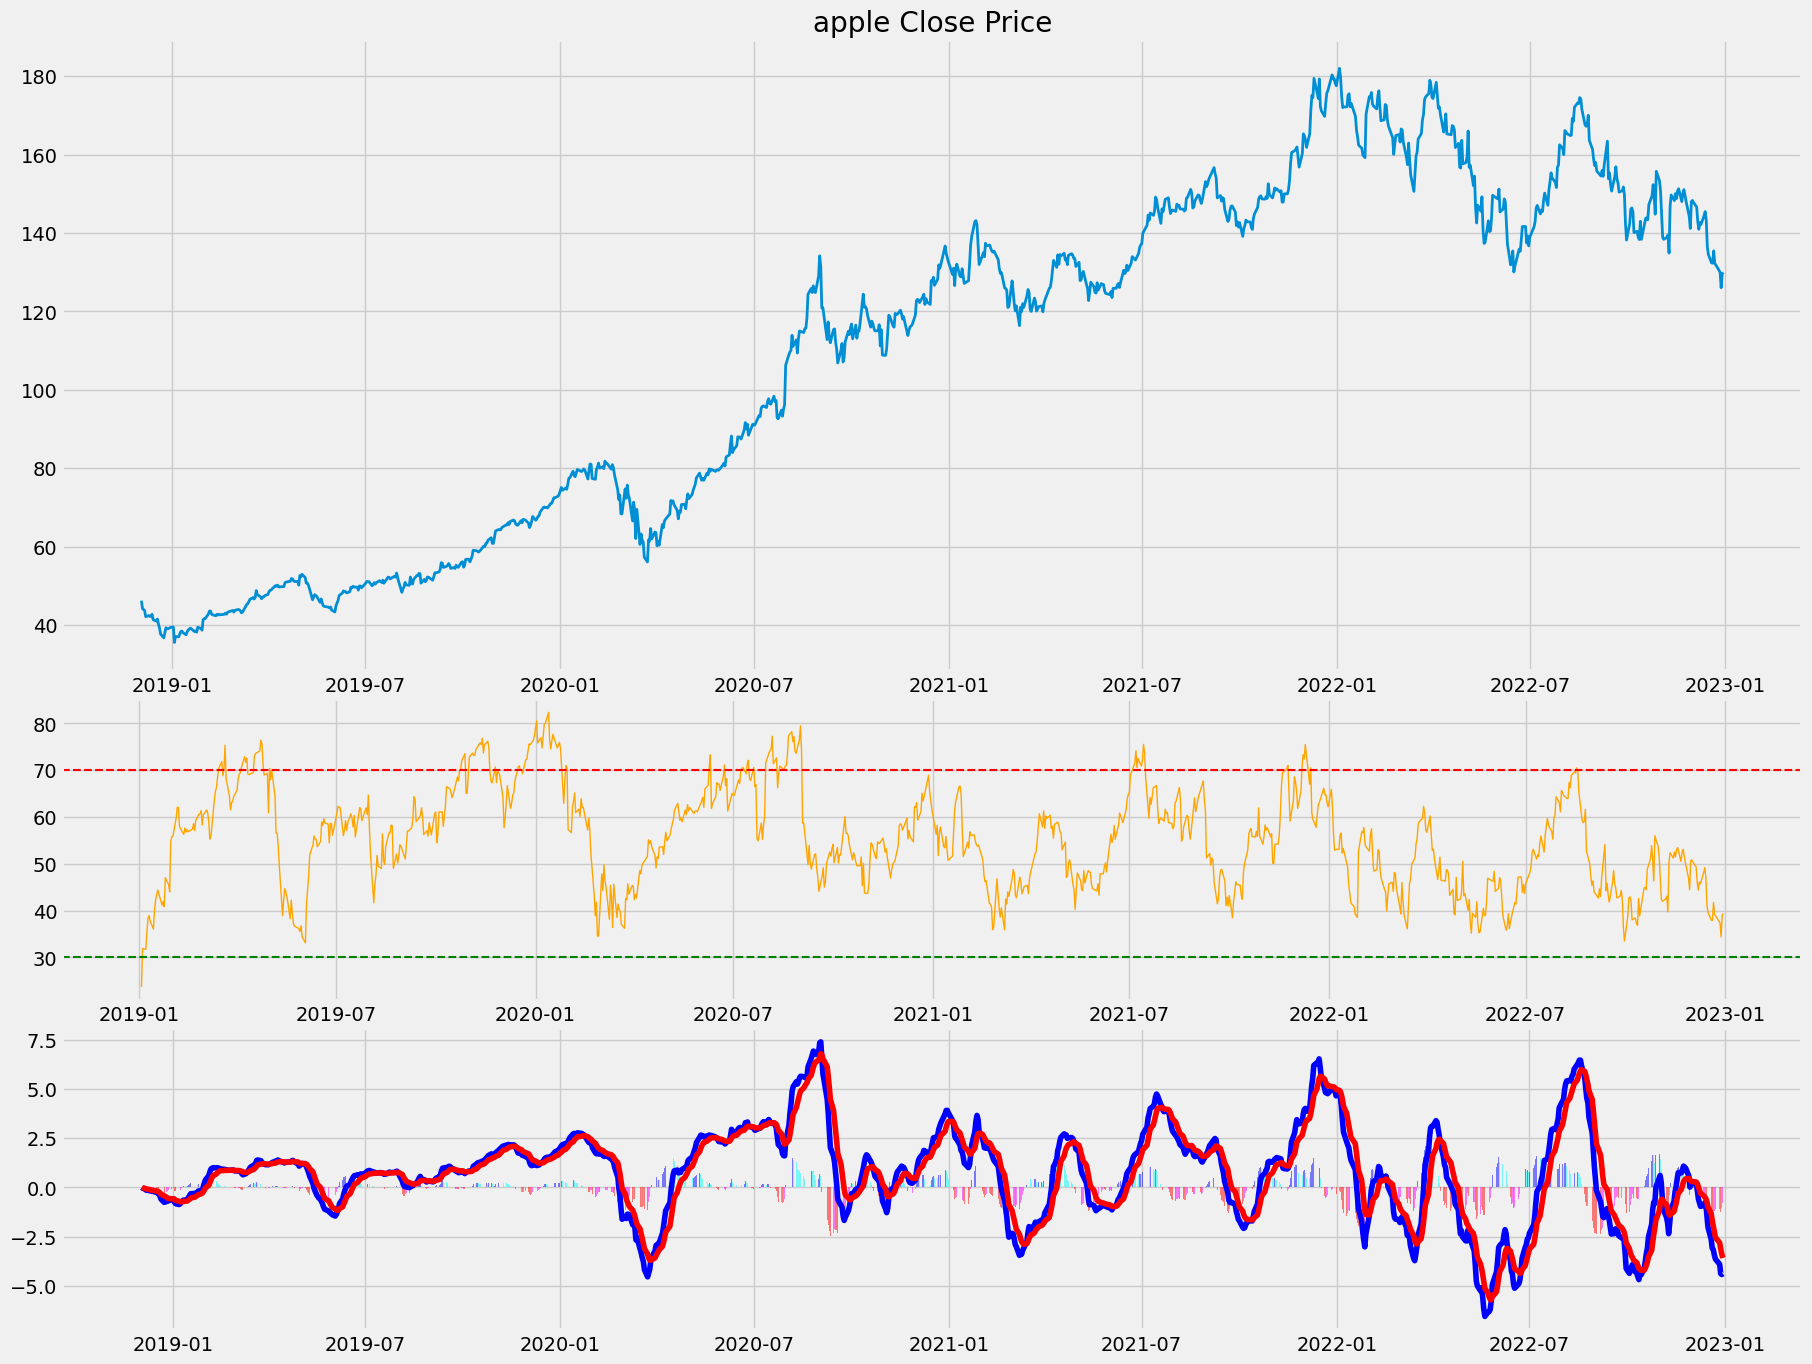

In [128]:
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (4,0), rowspan = 2, colspan = 1)
ax3 = plt.subplot2grid((10,1), (6,0), rowspan = 2, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df['Close'], linewidth=2)


ax1.set_title('apple Close Price')

# Second chart
# Plot the RSI
ax2.plot(df['rsi'], color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')


ax3.plot(df['macd'], label='MACD Line', color='blue')
ax3.plot(df['macd signal'], label='Signal Line', color='red')

y = df['macd_histogram'].tolist()

color = [[1,0,0] if y[i] < 0 and y[i] < y[i-1] else ([1,0,1] if y[i] < 0 and y[i] > y[i-1]  
         else ([0,0,1] if y[i] > 0 and y[i] > y[i-1] else [0,1,1]))   for i in range(len(y))]

ax3.bar(df.index, y, label='Histogram', color=color, alpha=0.5)



In [49]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['High'],
                        low=stock_data['Low'],
                        close=stock_data['Close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.apply(lambda x:compute_atr(x))

AttributeError: 'NoneType' object has no attribute 'apply'

In [24]:
# Set the theme of our chart
plt.style.use('fivethirtyeight')

# Make our resulting figure much bigger
plt.rcParams['figure.figsize'] = (20, 20)

In [10]:
df['garman_klass_vol'] = ((np.log(df['High'])-np.log(df['Low']))**2)/2-(2*np.log(2)-1)*((np.log(df['Adj Close'])-np.log(df['Open']))**2)


df['rsi'] = df.groupby(['Adj Close']).transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])


df['bb_mid'] = df.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['High'],
                        low=stock_data['Low'],
                        close=stock_data['Close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['Adj Close'].apply(compute_macd)

df['dollar_volume'] = (df['Adj Close']*df['Volume'])/1e6

df

ValueError: Cannot set a DataFrame with multiple columns to the single column rsi

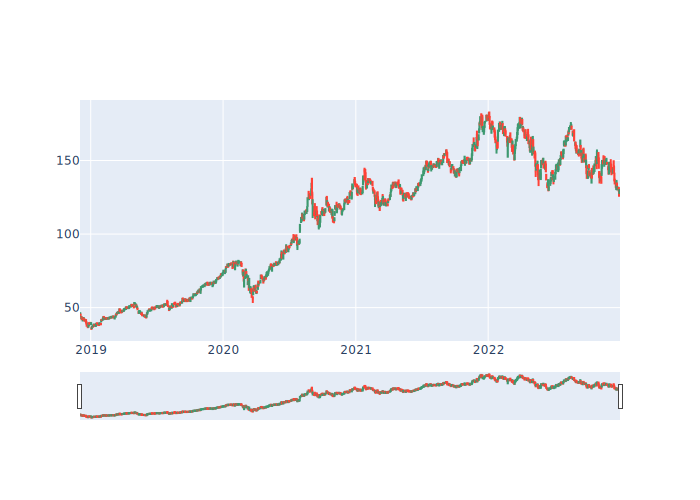

In [10]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show(renderer="svg")

In [7]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.10, subplot_titles=('CBA', 'Volume'),
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df.index, open=df["Open"], high=df["High"],
                low=df["Low"], close=df["Close"], name="OHLC"),
                row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df["MA50"], marker_color='grey',name="MA50"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["MA200"], marker_color='lightgrey',name="MA200"), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='red', showlegend=False), row=2, col=1)

fig.update_layout(
    title='CBA historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
)

fig.update(layout_xaxis_rangeslider_visible=True)
fig.show(renderer="colab")
